Here we will analyse trade data from the [FAO trade matrix](http://ref.data.fao.org/dataset?entryId=146410ae-7b66-4f1c-886b-79b1ab435327&tab=metadata).
The data we're concerned with is the trade of live cattle, pigs, goats, sheep.

First, however, let's have a look at the populations of all these criters in South America.

In [5]:
livestock.population <- read.csv("../../DATA/TRADE_DATA/livestock_population_South_America.csv")

In [6]:
head(livestock.population)

Area,Year,Asses,Buffaloes,Camelids..other,Cattle,Goats,Horses,Mules,Pigs,Sheep
Argentina,1961,129000,0,0,42520000,5000000,4184000,328000,3787000,50150000
Argentina,1962,120000,0,0,42901000,4970000,3966000,319000,3074729,47305408
Argentina,1963,110000,0,0,40009120,4980000,3761235,309000,3416559,46157904
Argentina,1964,100000,0,0,42300000,4998000,3760000,300000,3400000,47500000
Argentina,1965,100000,0,0,46708688,5098000,3760000,300000,3700000,49000000
Argentina,1966,98000,0,0,48800000,5200000,3780000,280000,4000000,48500000


In [16]:
livestock.pop.dt <- reshape2::melt(livestock.population, id = c("Area", "Year"),
                                  variable.name = "livestock", value.name = "population")
livestock.pop.dt$livestock <- gsub("..other", "", livestock.pop.dt$livestock)

In [10]:
head(livestock.pop.dt)

Area,Year,livestock,population
Argentina,1961,Asses,129000
Argentina,1962,Asses,120000
Argentina,1963,Asses,110000
Argentina,1964,Asses,100000
Argentina,1965,Asses,100000
Argentina,1966,Asses,98000


In [23]:
library(ggplot2)
number_ticks <- function(n) {function(limits) pretty(limits, n)}

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”

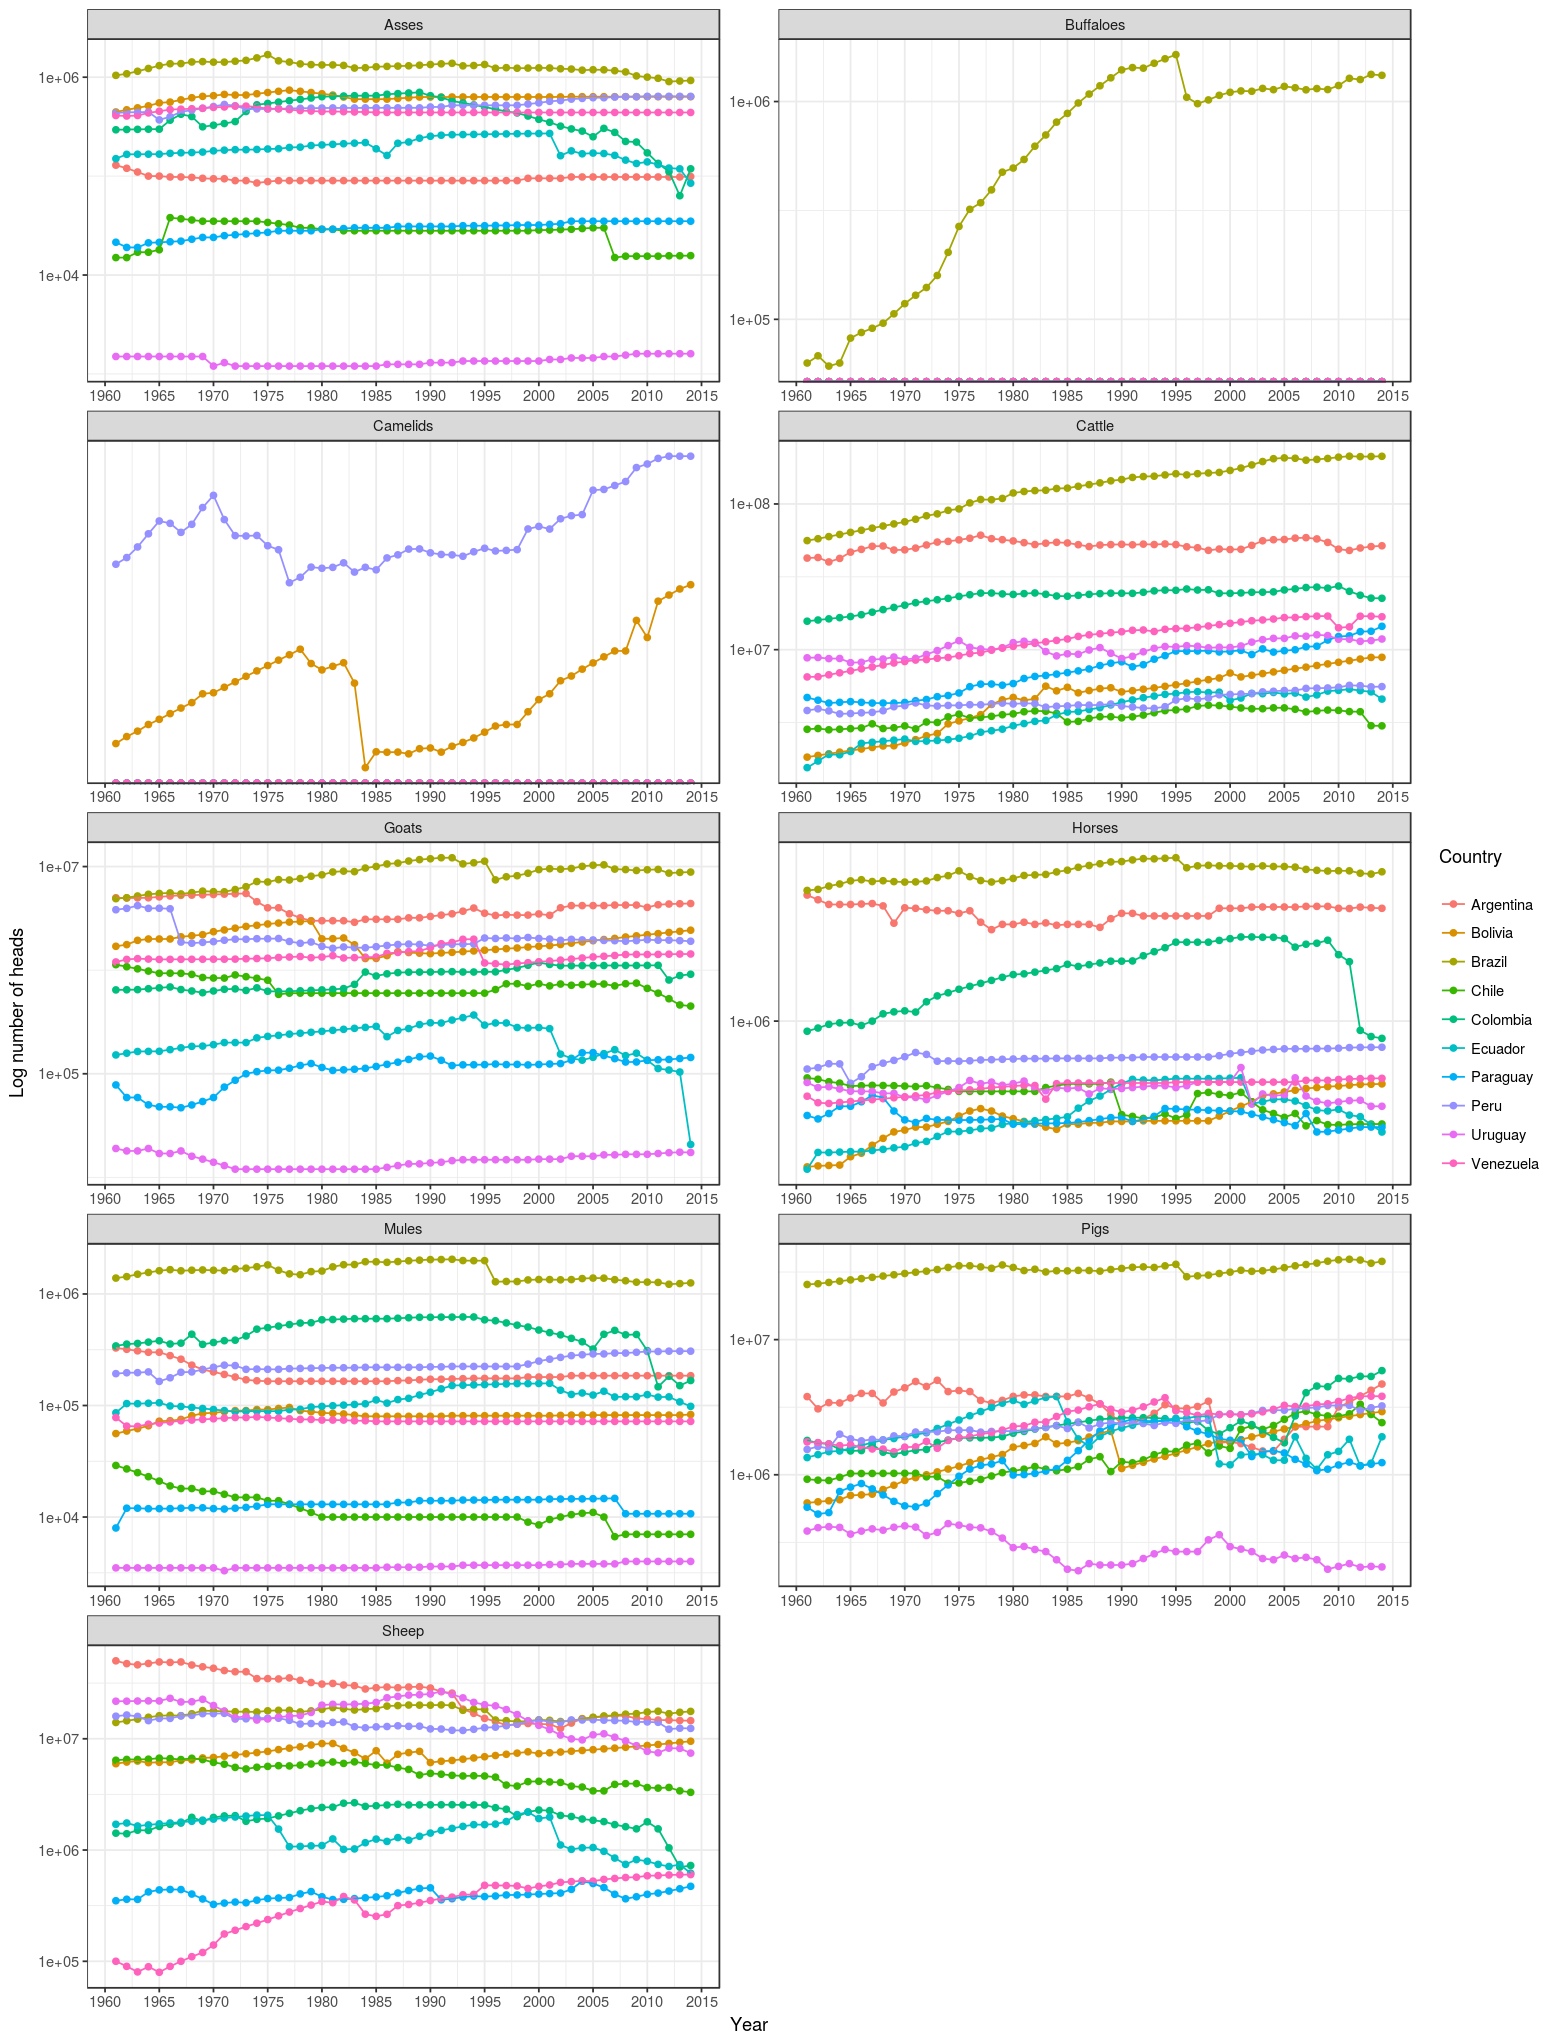

In [28]:
options(repr.plot.width = 13, repr.plot.height = 17)
p <- ggplot(livestock.pop.dt, aes(x = Year, y = population, fill = Area, colour = Area)) +
geom_point() + 
geom_line() +
labs(fill = "Country \n", color = "Country \n") +
scale_y_log10("Log number of heads")+
scale_x_continuous("Year",  breaks = number_ticks(10)) +
facet_wrap(~livestock, scales = "free", ncol = 2) +
theme_bw()+ 
NULL
p 

In [29]:
pdf("../../FIGURES/PLOTS/livestock_production_SouthAmerica.pdf")
p
dev.off

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”

function (which = dev.cur()) 
{
    if (which == 1) 
        stop("cannot shut down device 1 (the null device)")
    .External(C_devoff, as.integer(which))
    dev.cur()
}
<bytecode: 0x58c7f18>
<environment: namespace:grDevices>